<h2> Importing the Librairies </h2> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<h2> Data Collection and Processing </h2>

In [2]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('C:/Users/hakim/OneDrive/Bureau/ENSI/ML Projects/Gold Price Prediction using Random Forest Regressor/gld_price_data.csv')

In [3]:
# Visualising the data
# Values Ranging From 1/2/2008 to 5/16/2018 (10 years worth of DATA)
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#Number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Number of missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<dl>
<dt>Correlation</dt>
<dd>1. Positive Correlation.</dd>
<dd>1. Negative Correlation.</dd>
</dl>

    


In [10]:
correlation = gold_data.corr()

<AxesSubplot:>

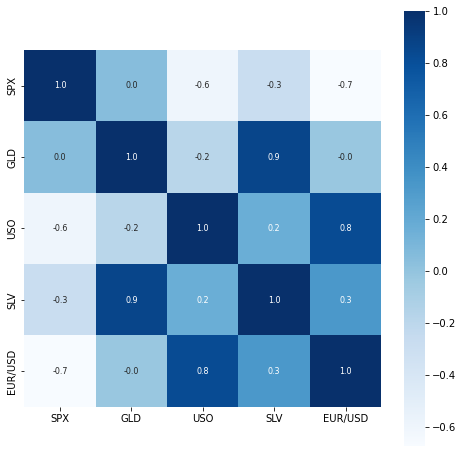

In [17]:
#Constructiong a heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\users\hakim\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

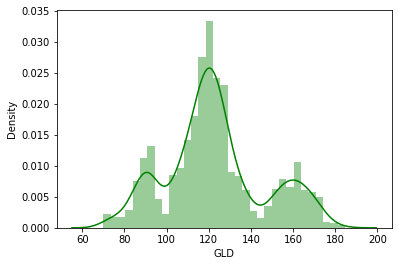

In [19]:
#Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

<h2> Splitting the Features and Target

In [20]:
X = gold_data.drop(['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [22]:
print (X, Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<h2> Splitting into Train data and Test Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 2)

<h2> Model Training <h2>
<h5> Model Forest Regression </h5>

In [24]:
regressor = RandomForestRegressor(n_estimators = 100)

In [25]:
# Training the model 
regressor.fit (X_train, Y_train)

RandomForestRegressor()

<h2> Model Evaluation 

In [26]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [27]:
print (test_data_prediction)

[168.46819917  81.97130001 115.79639976 127.64700093 120.67840115
 154.71179775 150.35049739 126.22520035 117.57399885 125.99790038
 116.51670119 171.61160076 142.18589874 167.58399857 115.19679975
 117.39480064 138.22600312 170.11230094 159.5673025  156.98089875
 155.00810037 125.23170039 175.53839911 157.25950319 125.08290046
  93.89739968  77.7809002  120.68499999 119.09949939 167.47059952
  88.2424006  125.25040046  91.16240049 117.60390039 120.97689897
 137.0482015  115.30840137 115.24360068 146.78729945 107.14690088
 104.11020233  87.1856977  126.46570035 118.02560019 153.22589935
 119.61500014 108.39779961 108.01039831  93.17690077 127.04839802
  75.39360033 113.7715995  121.13040036 111.12319924 118.90409883
 120.77809924 158.82349973 167.72600049 147.0383964   85.87709856
  94.21890031  86.80239904  90.73729988 119.09600061 126.44140066
 127.43529937 170.43899989 122.28139933 117.30099886  99.02540033
 168.82540181 143.3231986  132.04320194 121.20420178 121.07629934
 119.56520

In [28]:
# R Squarred Error 
error_score = metrics.r2_score(Y_test,test_data_prediction)
print ("R Squarred Error : ", error_score)

R Squarred Error :  0.9888104594531595


<h2> Compare the Actual Values and Predited Values in a Plot 

In [29]:
Y_test = list (Y_test)

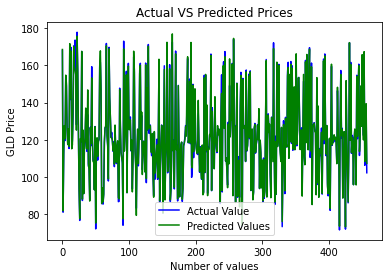

In [35]:
plt.plot(Y_test, color ='blue', label='Actual Value')
plt.plot(test_data_prediction, color ='green',label='Predicted Values')
plt.title ('Actual VS Predicted Prices')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()